Final distance: 954.4901707905733


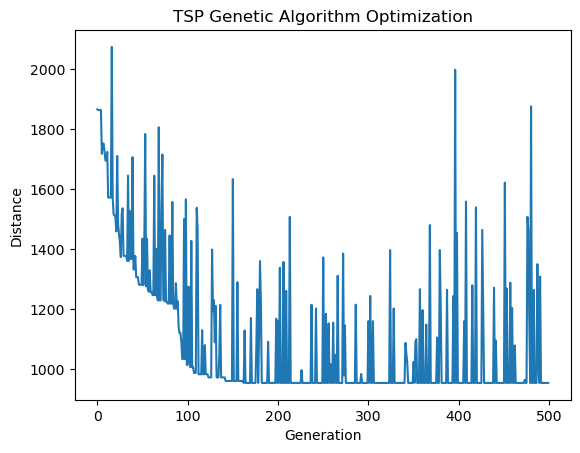

Best Route: [(85,77), (117,53), (147,36), (115,24), (109,4), (80,2), (65,17), (51,17), (40,7), (36,29), (0,15), (20,40), (10,74), (29,79), (11,99), (19,115), (96,92), (128,98), (191,153), (143,155), (106,131), (62,172), (63,190), (8,181), (36,155)]


In [2]:
import numpy as np
import random
import operator
import matplotlib.pyplot as plt

# Define a class to represent a city with coordinates
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        return np.sqrt((self.x - city.x)**2 + (self.y - city.y)**2)

    def __repr__(self):
        return f"({self.x},{self.y})"

# Compute the total distance of a route
def routeDistance(route):
    distance = 0
    for i in range(len(route)):
        fromCity = route[i]
        toCity = route[(i + 1) % len(route)]  # Ensure a complete tour
        distance += fromCity.distance(toCity)
    return distance

# Compute fitness (lower distance means better fitness)
def fitness(route):
    return 1 / routeDistance(route)

# Rank routes based on fitness
def rankRoutes(population):
    fitnessResults = {i: fitness(population[i]) for i in range(len(population))}
    return sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)

# Selection process using a tournament
def selection(popRanked, eliteSize):
    selected = [popRanked[i][0] for i in range(eliteSize)]  # Keep elites
    for _ in range(len(popRanked) - eliteSize):
        idx = random.randint(0, len(popRanked) - 1)
        selected.append(popRanked[idx][0])
    return selected

# Mating pool selection
def matingPool(population, selected):
    return [population[i] for i in selected]

# Ordered Crossover (OX)
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]
    
    remaining = [city for city in parent2 if city not in child]
    idx = 0
    for i in range(len(child)):
        if child[i] is None:
            child[i] = remaining[idx]
            idx += 1
    return child

# Apply crossover to the mating pool
def breedPopulation(matingpool, eliteSize):
    children = matingpool[:eliteSize]  # Elitism
    for i in range(len(matingpool) - eliteSize):
        parent1 = random.choice(matingpool)
        parent2 = random.choice(matingpool)
        children.append(crossover(parent1, parent2))
    return children

# Mutation (swap two cities)
def mutate(route, mutationRate):
    for i in range(len(route)):
        if random.random() < mutationRate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

# Apply mutation to the population
def mutatePopulation(population, mutationRate):
    return [mutate(route, mutationRate) for route in population]

# Generate the next generation
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selected = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selected)
    children = breedPopulation(matingpool, eliteSize)
    nextGen = mutatePopulation(children, mutationRate)
    return nextGen

# Genetic Algorithm function
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = [random.sample(population, len(population)) for _ in range(popSize)]
    print("Initial distance: " + str(routeDistance(pop[0])))

    for i in range(generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)

    print("Final distance: " + str(routeDistance(pop[0])))
    return pop[0]  # Return the best route

# Run Genetic Algorithm and plot the distance over generations
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = [random.sample(population, len(population)) for _ in range(popSize)]
    progress = []

    for i in range(generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        bestDistance = routeDistance(pop[0])
        progress.append(bestDistance)

    print("Final distance: " + str(routeDistance(pop[0])))
    bestRoute = pop[0]
    
    # Plot progress
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.title('TSP Genetic Algorithm Optimization')
    plt.show()

    return bestRoute

# Create a list of random cities
cityList = []
for i in range(25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

# Run the Genetic Algorithm
best_route = geneticAlgorithmPlot(cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

# Print the best route found
print("Best Route:", best_route)
